# Métodos de Clustering
Vamos ver algumas métodos de clustering implementados nos packages do Python.

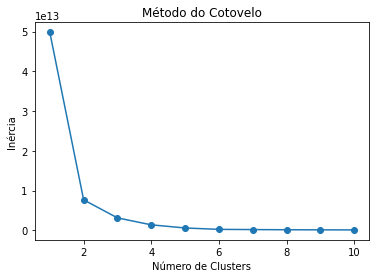

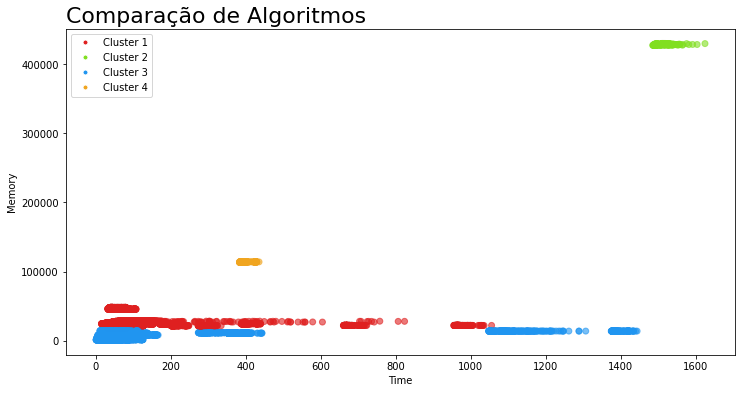

In [34]:
# Clustering com kmeans
# temos de fornever o valor de k (#clusters)
from sklearn.cluster import KMeans
from matplotlib.lines import Line2D
import pandas as pd
import matplotlib.pyplot as plt


file_name = '../measurements.csv'
df = pd.read_csv(file_name, header=0, delimiter=",", decimal=".")

# preprocessa categoricos com one hot encoding
df = pd.get_dummies(df, columns=["Language", "Program"])  

# Determinar o número ideal de clusters usando o método do cotovelo
inertias = []
max_clusters = 10  # Número máximo de clusters a serem testados
for k in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

# Plotar o gráfico do método do cotovelo
plt.plot(range(1, max_clusters+1), inertias, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

K_Clusters = 4  # Número ideal de clusters escolhido

# k-means
kmeans = KMeans(n_clusters=K_Clusters, random_state=0, n_init='auto')
# Obter clusters
df['cluster'] = kmeans.fit_predict(df)

centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
# Adicionar os centróides ao dataframe
df['cen_x'] = df['cluster'].map(lambda x: cen_x[x])
df['cen_y'] = df['cluster'].map(lambda x: cen_y[x])
# Definir as cores dos clusters
colors = ['#DF2020', '#81DF20', '#2095F0', '#F0A520']
df['c'] = df['cluster'].map(lambda x: colors[x])

plt.figure(figsize=(12,6))

column_1 = "Time"
column_2 = "Memory"

plt.scatter(df[column_1], df[column_2], c=df.c, alpha=0.6)

# Criar a lista de elementos da legenda
legend_elements = [Line2D([0], [0], marker='o', color='w', 
                          label='Cluster {}'.format(i+1), 
                          markerfacecolor=mcolor, markersize=5) 
                   for i, mcolor in enumerate(colors)]

# Plotar a legenda
plt.legend(handles=legend_elements)

# Título e rótulos dos eixos
plt.title('Comparação de Algoritmos', loc='left', fontsize=22)
plt.xlabel(f'{column_1}')
plt.ylabel(f'{column_2}')

plt.show()


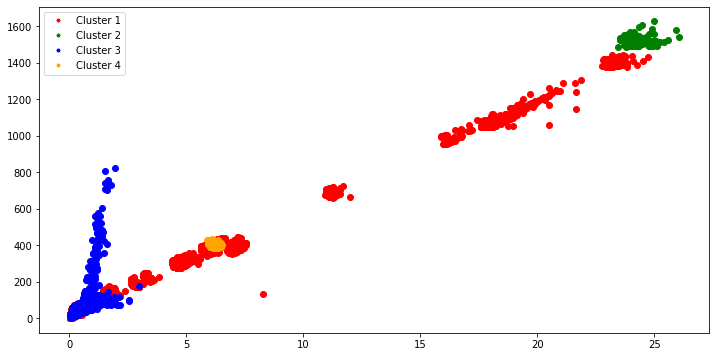

Cluster    Distribuição de Probabilidades
c=1  [0.00000000e+00 1.00000000e+00 0.00000000e+00 2.65378715e-93]
c=1  [0.00000000e+00 1.00000000e+00 0.00000000e+00 4.64511252e-24]
c=2  [0.00000000e+000 1.74490973e-120 1.00000000e+000 9.31434777e-169]
c=3  [0.00000000e+00 3.42433319e-20 0.00000000e+00 1.00000000e+00]
c=2  [0.00000000e+000 1.12843303e-126 1.00000000e+000 4.14362407e-160]
c=3  [0.00000000e+000 1.27417595e-182 0.00000000e+000 1.00000000e+000]
c=1  [0.00000000e+00 1.00000000e+00 0.00000000e+00 1.25024042e-44]
c=1  [0.00000000e+00 1.00000000e+00 0.00000000e+00 2.73034539e-38]
c=0  [1.00000000e+000 0.00000000e+000 0.00000000e+000 2.86327575e-221]
c=2  [0.00000000e+000 1.48990194e-199 1.00000000e+000 1.15806614e-261]
c=1  [0.00000000e+00 1.00000000e+00 0.00000000e+00 9.11081118e-90]
c=3  [0.00000000e+000 1.45893386e-303 0.00000000e+000 1.00000000e+000]
c=3  [0.00000000e+000 4.01304415e-193 0.00000000e+000 1.00000000e+000]
c=1  [0.00000000e+00 1.00000000e+00 0.00000000e+00 4.526941

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.mixture import GaussianMixture

# dataset
file_name = '../measurements.csv'
data = pd.read_csv(file_name, header=0, delimiter=",", decimal=".")
data = data.drop(columns=['DRAM'])
# preprocessa categoricos com one hot encoding
data = data.drop(columns=['Language'])
data = data.drop(columns=['Program'])

# training gaussian mixture model 
gmm = GaussianMixture(n_components=4)
gmm.fit(data)

# predictions from gmm
labels = gmm.predict(data)
frame = pd.DataFrame(data)

frame['cluster'] = labels
frame.columns = ["Cost", "PowerLimit", "Size", "Package", "Core", "GPU", "Time", "Temperature", "Memory", "cluster"]

colors = ['red', 'green', 'blue', 'orange']

NUMBER_OF_CLUSTERS = 4

plt.figure(figsize=(12, 6))
for k in range(0, NUMBER_OF_CLUSTERS):
    data = frame[frame["cluster"] == k]
    plt.scatter(data["Package"], data["Time"], c=colors[k])

# create a list of legend elements
legend_elements = [Line2D([0], [0], marker='o', color='w', 
                          label='Cluster {}'.format(i+1), 
                          markerfacecolor=mcolor, markersize=5) 
                   for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements)

plt.show()

# calcular probs dos casos por cluster
X = data[59:76]
X.columns = ["Cost", "PowerLimit", "Size", "Package", "Core", "GPU", "Time", "Temperature", "Memory", "cluster"]
X = X.drop(columns=['cluster'])

# imprime elementos, cluster e distribuição de probs
print("Cluster    Distribuição de Probabilidades")
a = gmm.fit_predict(X)
b = gmm.predict_proba(X)
i = 0
for x in a:
    print("c={}  {}".format(x, b[i]))
    i += 1


DBSCAN(eps=1, min_samples=3)
Estimated number of clusters: 968
Estimated number of noise points: 26240


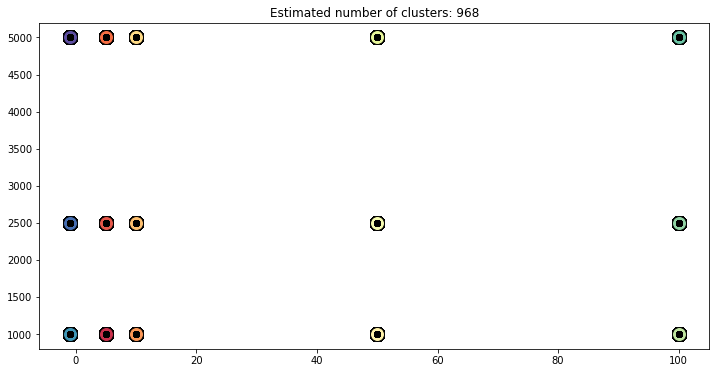

In [36]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dataset
file_name = '../measurements.csv'
data = pd.read_csv(file_name, header=0, delimiter=",", decimal=".")
# data = data.drop(columns=['test'])
data = pd.get_dummies(data, columns=["Language", "Program"])  

clust = DBSCAN(eps=1, min_samples=3).fit(data)
labels = clust.labels_

print(clust)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

X = np.array(data)

plt.figure(figsize=(12, 6))
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[clust.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()


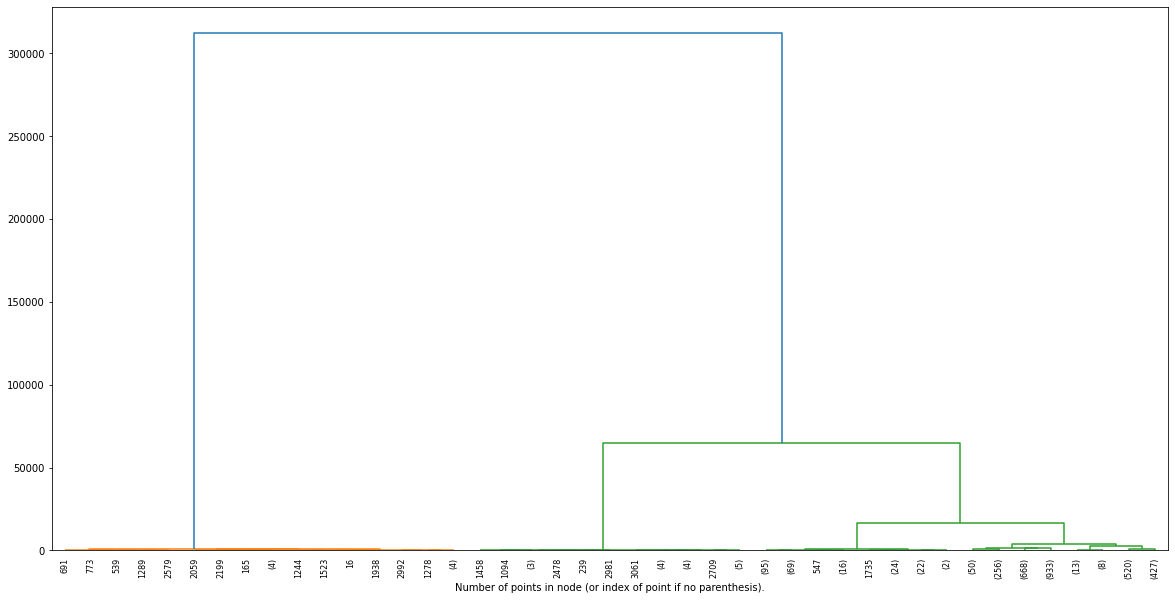

In [37]:
# Hierachical Clustering
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
import matplotlib.pyplot as plt

file_name = '../measurements.csv'
a = pd.read_csv(file_name, header=0, delimiter=",", decimal=".")

# preprocessa categoricos com one hot encoding
a = a.drop(columns=['DRAM'])
a = a.drop(columns=['Language'])
a = a.drop(columns=['Program'])
b = a.drop(columns=['Size'])

#print("num regs="+str(a.size/a.columns.size))

# Amostragem aleatória de 10% dos dados
sample_size = int(len(b) * 0.1)
random_indices = np.random.choice(len(b), size=sample_size, replace=False)
b_sample = b.iloc[random_indices]

link = linkage(b_sample, method='single', metric='euclidean')
plt.figure(figsize=(20, 10))
dendrogram(link, truncate_mode="level", p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

plt.show()

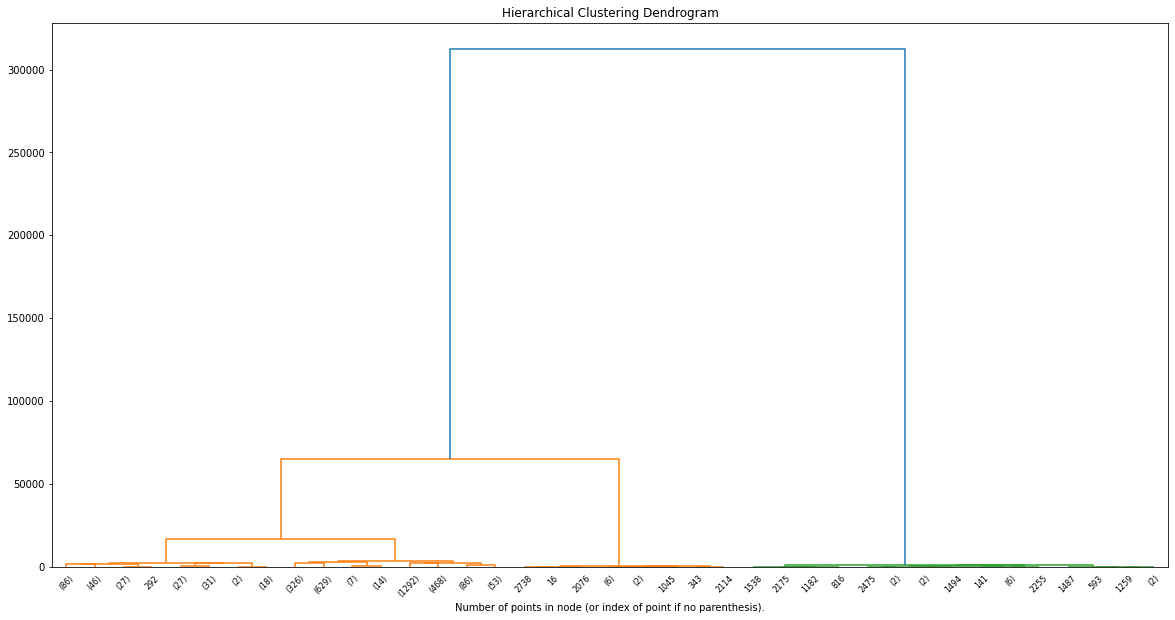

In [38]:
# Agglomerative Clustering (bottom-up construction)

import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# Carrega o arquivo de dados
file_name = '../measurements.csv'
a = pd.read_csv(file_name, header=0, delimiter=",", decimal=".")
a = a.drop(columns=['DRAM'])
a = a.drop(columns=['Language'])
a = a.drop(columns=['Program'])

# Amostragem aleatória de 10% dos dados
sample_size = int(len(a) * 0.1)
random_indices = np.random.choice(len(a), size=sample_size, replace=False)
a_sample = a.iloc[random_indices]

# Executa o clustering hierárquico na amostra
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='single', metric='euclidean')
model.fit(a_sample)

# Plota o dendrograma
plt.figure(figsize=(20, 10))
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()